# Another example of the applying different embeddings to a time series dataset and classifying the results.
### Here, the dataset used is the ECG5000 time series dataset, downloaded from https://www.timeseriesclassification.com/description.php?Dataset=ECG5000

In [ ]:
import novanova3.scripts.embd_fgit as embd
import scripts.clasfy_p1 as clasfy
import scripts.clasfy_p2 as clasfy2
import scripts.plot_umap_em as plt_um
import pandas as pd
import numpy as np
import time

In [ ]:
#importing the datasets
x_train_df = pd.read_csv('ecg5000_x_train.csv')
x_val_df = pd.read_csv('ecg5000_x_val.csv')
y_train_df = pd.read_csv('ecg5000_y_train.csv')
y_val_df = pd.read_csv('ecg5000_val.csv')
x_test_df = pd.read_csv('ecg5000_x_test.csv')
y_test_df = pd.read_csv('ecg5000_y_test.csv')

print("CSV files have been read successfully.")


CSV files have been read successfully.


In [26]:
pip install --upgrade keras-hypetune

Note: you may need to restart the kernel to use updated packages.


In [13]:
#Performing scaling of the datasets
train_sc, val_sc, test_sc = embd.std_scaling(x_train_df, x_val_df, x_test_df)
#without overlapping windows
train_sct=train_sc
test_sct=test_sc
val_sct=val_sc
ny_train=y_train_df
ny_test=y_test_df
ny_val=y_val_df
ny_train2=y_train_df-1
ny_test2=y_test_df-1
ny_val2=y_val_df-1


In [36]:
np.unique(ny_train)

array([1, 2, 3, 4, 5])

# Running Each of the Embeddings according to the paper
## First the PCA method

In [37]:
#pca embedding
train_pca, val_pca, test_pca = embd.pca_embedding(train_sc, val_sc, test_sc,64)

In [ ]:
#to save your embeddings
np.savetxt('tr_ep_pca_embeddings.txt', train_pca)
np.savetxt('te_ep_pca_embeddings.txt', test_pca)
np.savetxt('vl_ep_pca_embeddings.txt', val_pca)

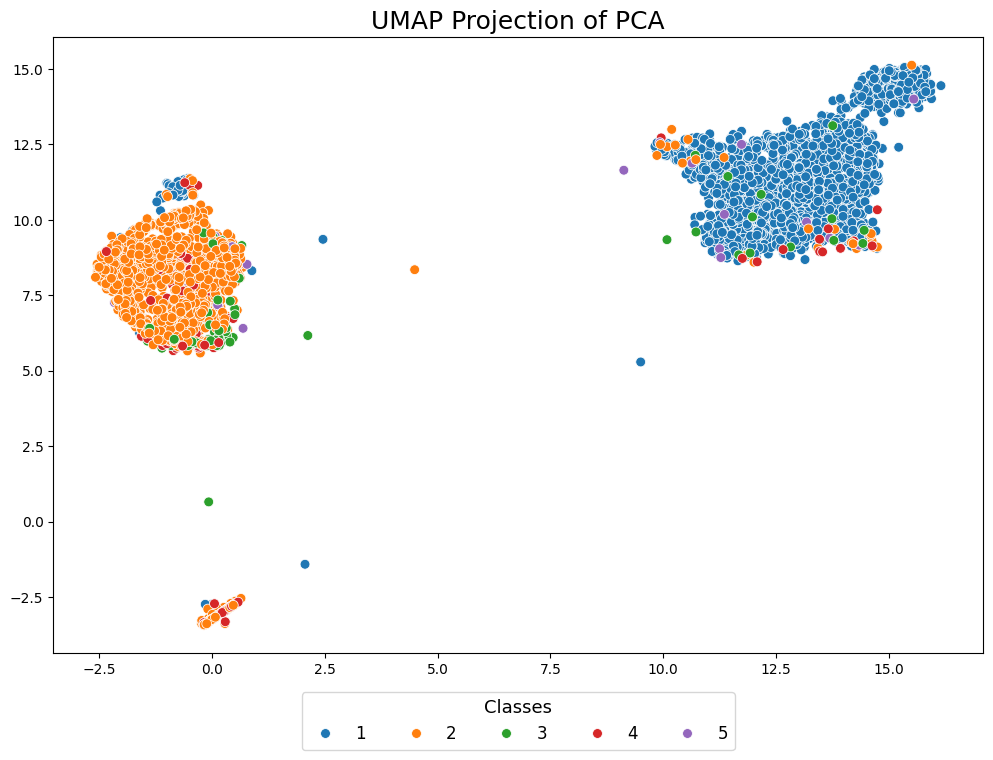

In [39]:
#to plot the umap visualization of the embedding
name='pca'
#to get the umap embedding
plt_um.umap_plt(train_pca, val_pca, test_pca, ny_train, ny_val, ny_test, 'PCA')

## Now the Discrete Wavelet Transform

In [14]:
#discrete wavelet transform
train_wt, val_wt, test_wt = embd.wavelet_embedding(train_sc, val_sc, test_sc)

In [ ]:
np.savetxt('tr_ep_wt_embeddings.txt', train_wt)
np.savetxt('te_ep_wt_embeddings.txt', test_wt)
np.savetxt('vl_ep_wt_embeddings.txt', val_wt)

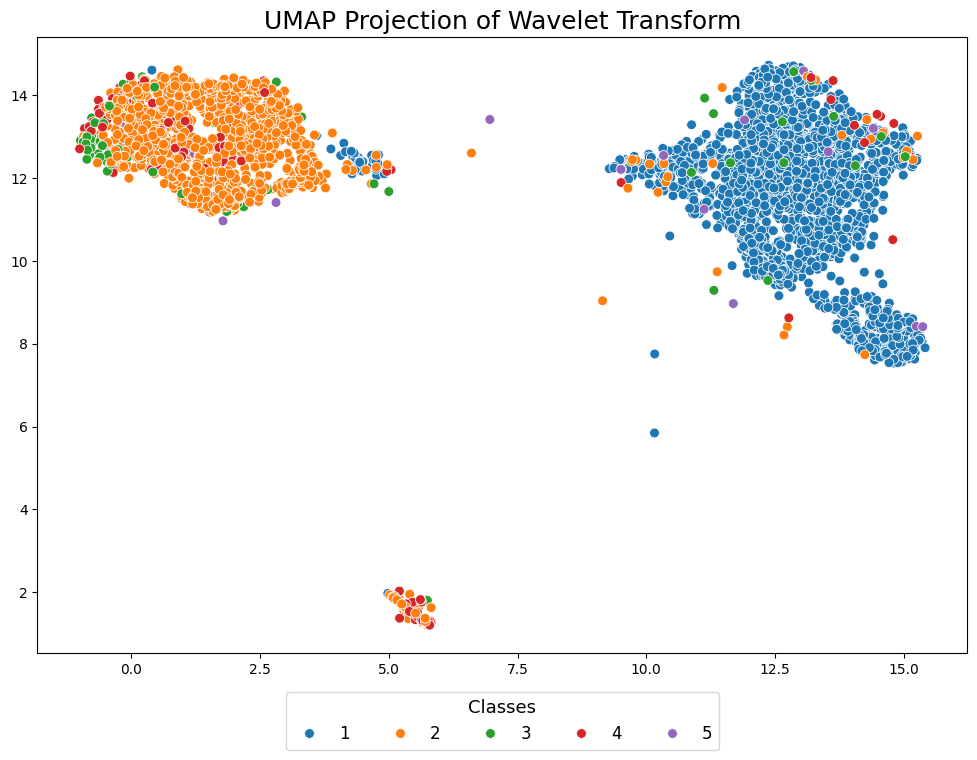

In [ ]:
#to get the umap embedding
plt_um.umap_plt(train_wt, val_wt, test_wt, ny_train, ny_val, ny_test, 'Wavelet Transform')

## For the Fast Fourier Transform

In [ ]:
#Fast Fourier Transform
train_fft, val_fft, test_fft = embd.fft_embedding(train_sc, val_sc, test_sc)

In [ ]:
np.savetxt('tr_ep_fft_embeddings.txt', train_fft)
np.savetxt('te_ep_fft_embeddings.txt', test_fft)
np.savetxt('vl_ep_fft_embeddings.txt', val_fft)

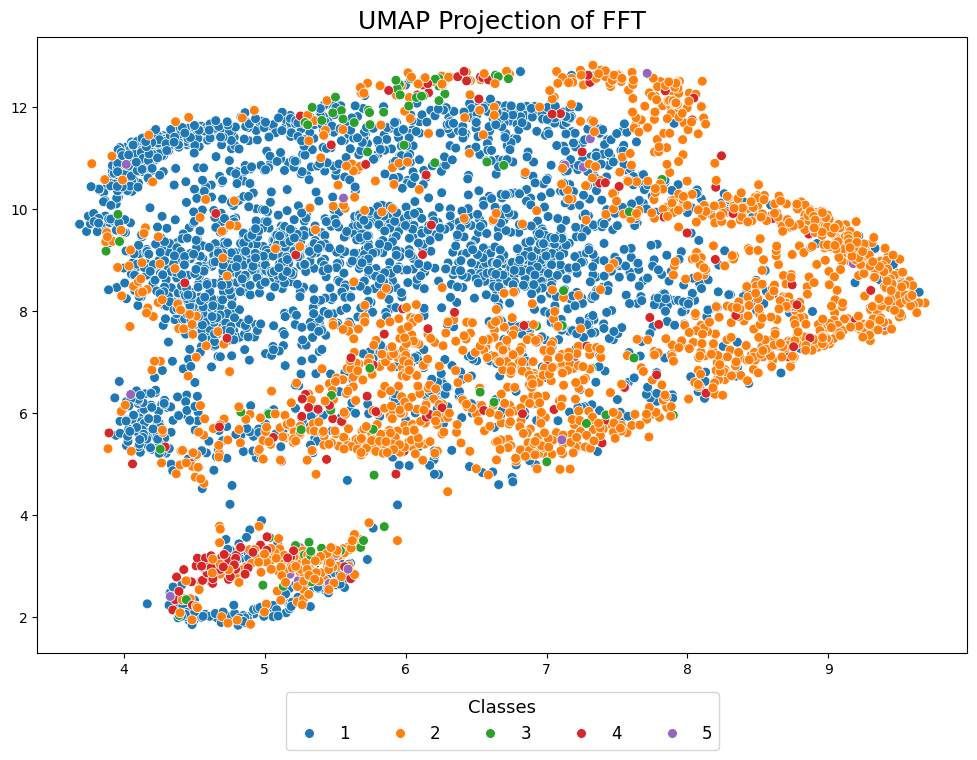

In [ ]:
#to get the umap embedding
plt_um.umap_plt(train_fft, val_fft, test_fft, ny_train, ny_val, ny_test, 'FFT')

## For the Graph Embedding, the following steps are performed

In [ ]:
#Graph Embedding
#Based on the source paper and the algorithm discussed, this scaling method is used
train_mmc, val_mmc,test_mmc = embd.minmax_scaling(x_train_df, x_val_df,x_test_df)
train_mml=train_mmc.values.tolist()
val_mml=val_mmc.values.tolist()
test_mml=test_mmc.values.tolist()

train_gr, val_gr, test_gr = embd.graph_embedding(train_mml, val_mml, test_mml)

In [ ]:
np.savetxt('tr_ep_gr_embeddings.txt', train_gr)
np.savetxt('te_ep_gr_embeddings.txt', test_gr)
np.savetxt('vl_ep_gr_embeddings.txt', val_gr)

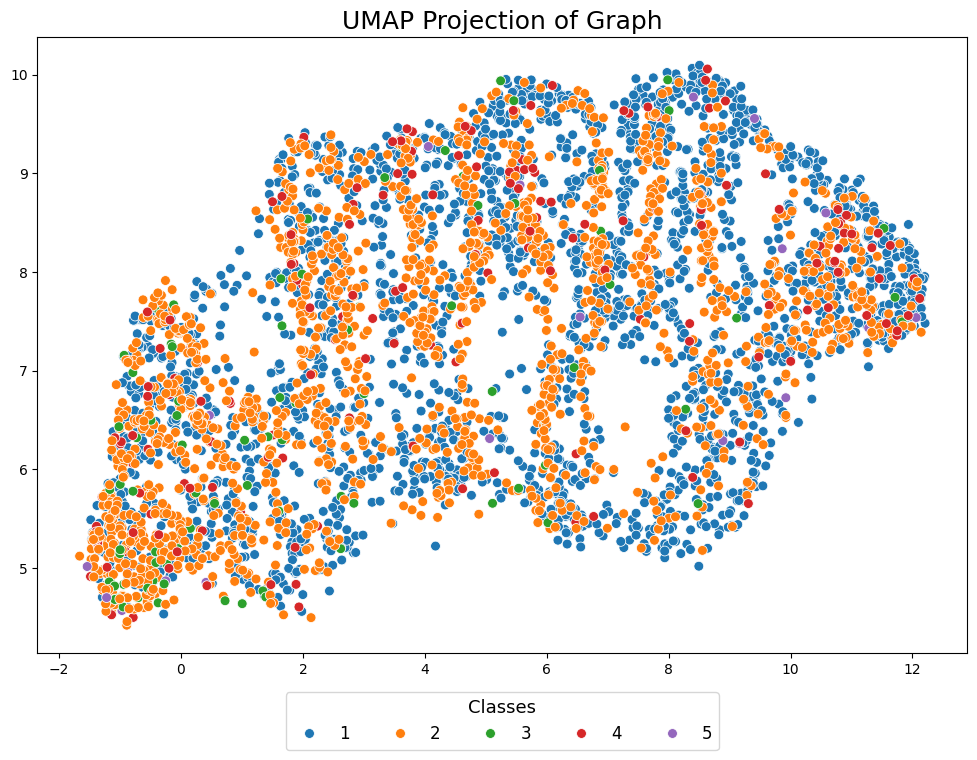

In [ ]:
#to get the umap embedding
plt_um.umap_plt(train_gr, val_gr, test_gr, ny_train, ny_val, ny_test, 'Graph')

## For the Topological Data Analysis method, the following function can be called and used

In [ ]:
#TDA Embedding
train_tda,val_tda,test_tda = embd.tda_embedding(train_mml, val_mml, test_mml)

In [ ]:
np.savetxt('tr_ep_tda_embeddings.txt', train_tda)
np.savetxt('te_ep_tda_embeddings.txt', test_tda)
np.savetxt('vl_ep_tda_embeddings.txt', val_tda)

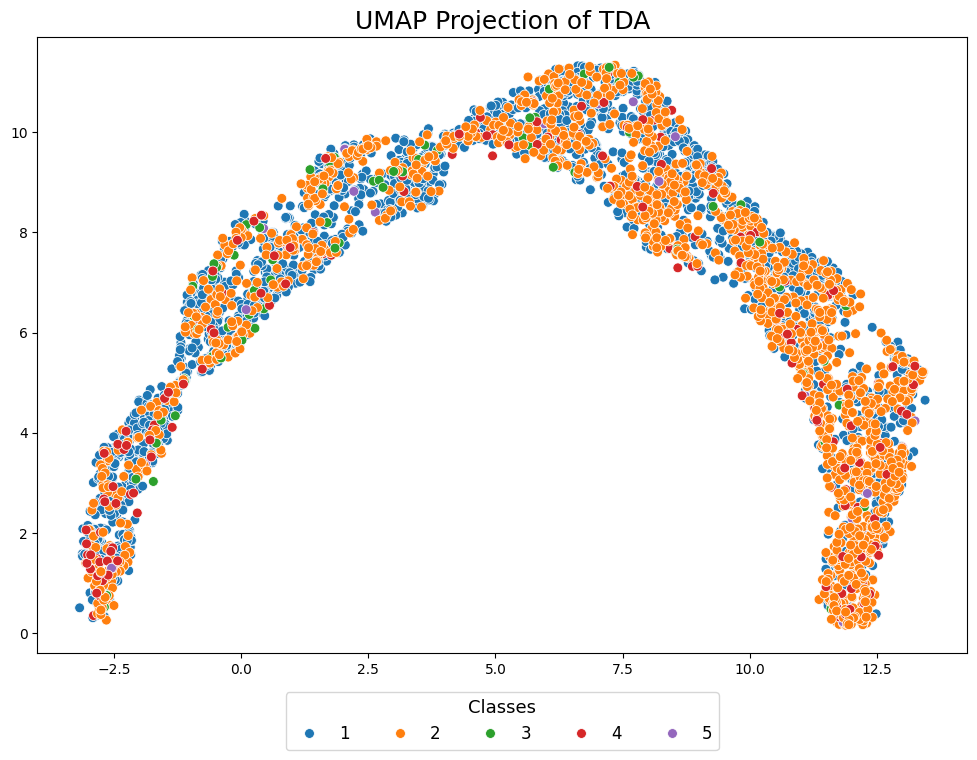

In [ ]:
#to get the umap embedding
plt_um.umap_plt(train_tda,val_tda, test_tda, ny_train, ny_val, ny_test, 'TDA')

## For the LLE method, several parameters also need to be defined, which can be defined using a dictionary like this example

In [ ]:
#LLE Embedding
train_lle, val_lle, test_lle = embd.lle_embedding(train_sc, val_sc, test_sc,{'n_components':64, 'n_neighbors':5,'random_state':12})

In [ ]:
np.savetxt('tr_ep_lle_embeddings.txt', train_lle)
np.savetxt('te_ep_lle_embeddings.txt', test_lle)
np.savetxt('vl_ep_lle_embeddings.txt', val_lle)

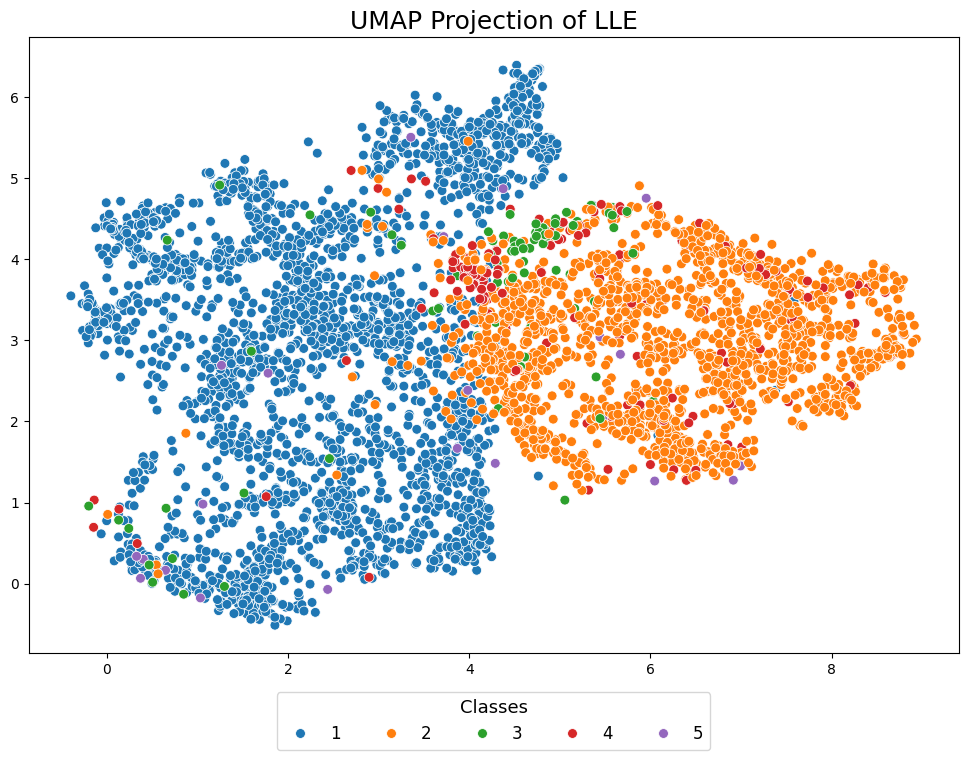

In [ ]:
plt_um.umap_plt(train_lle, val_lle, test_lle, ny_train, ny_val, ny_test, 'LLE')

## For the UMAP embedding of the time series data, we use the following function.
### Given that this is the umap embedding, for the plotting of data points we do not need to do the embedding twice

In [ ]:
#UMAP Embedding
train_umap, val_umap, test_umap = embd.umap_embedding(train_sc, val_sc, test_sc)

In [ ]:
np.savetxt('tr_ep_umap_embeddings.txt', train_umap)
np.savetxt('te_ep_umap_embeddings.txt', test_umap)
np.savetxt('vl_ep_umap_embeddings.txt', val_umap)

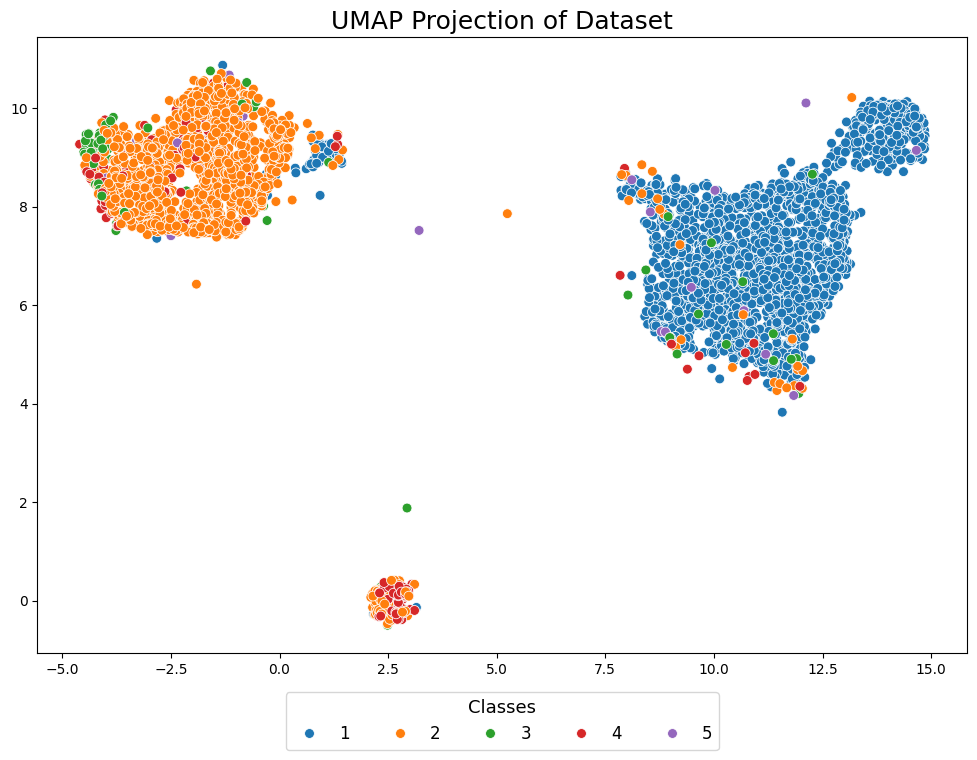

In [ ]:
plt_um.umap_plt(train_sc, val_sc, test_sc, ny_train, ny_val, ny_test, 'Dataset')

## For the Autoencoder embedding of time series data

In [ ]:
#AE Embedding
train_ae, val_ae, test_ae = embd.AE_embedding(train_sc, val_sc, test_sc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


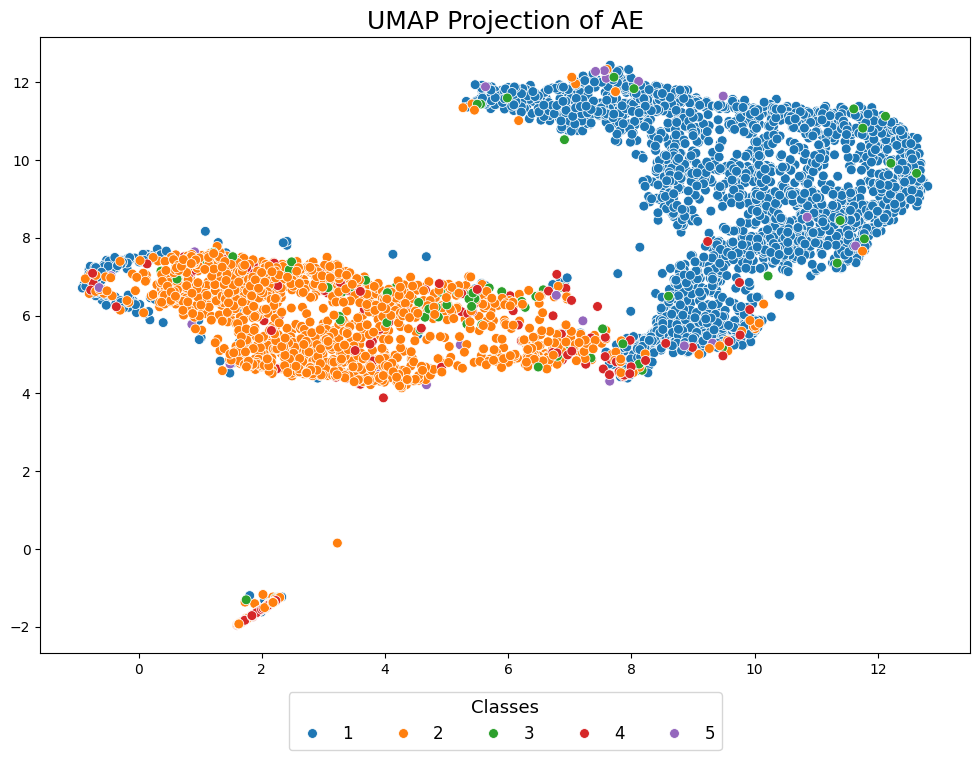

In [ ]:
plt_um.umap_plt(train_ae, val_ae, test_ae, ny_train, ny_val, ny_test, 'AE')

In [ ]:
np.savetxt('tr_ep_ae_embeddings.txt', train_ae)
np.savetxt('te_ep_ae_embeddings.txt', test_ae)
np.savetxt('vl_ep_ae_embeddings.txt', val_ae)

## For the NNCLR methods discussed in the paper, we would be importing the relative scripts, here entitled nnclr_emb. We would also need to specify the width and the number of classes, as well as import the relative y datasets.

In [ ]:
#nnclr_lstm embedding
#for the paper, 100 finetuning and training epochs were chosen, but here the example is done for 20 epochs
import scripts.nnclr_embd as nn
train_nn_lstm, val_nn_lstm, test_nn_lstm = nn.nnclr_lstm_embedding(train_sc, val_sc, test_sc,y_train_df-1,y_val_df-1,y_test_df-1,64,5)

x_train_df shape: (400, 140)
y_train_df shape: (400,)
x_val_df shape: (100, 140)
y_val_df shape: (100,)
x_test_df shape: (4500, 140)
y_test_df shape: (4500,)


Model: "encoder_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 140, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 140, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 140, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 140, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_4               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,400 (806.25 KB)

 Trainable params: 206,400 (806.25 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "nnclr_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ contrastive_augmenter (Sequential)   │ (None, None, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification_augmenter             │ (None, None, 1)             │               0 │
│ (Sequential)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_model (Sequential)           │ (None, 64)                  │         206,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ projection_head (Sequential)         │ (None, 64)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ linear_probe (Sequential)            │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,045 (840.02 KB)

 Trainable params: 215,045 (840.02 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
4/4 - 56s - 14s/step - c_acc: 0.0417 - c_loss: 3.5773 - p_acc: 0.1400 - p_loss: 1.6002 - r_acc: 0.0469 - val_p_acc: 0.5838 - val_p_loss: 1.6097
Epoch 2/20
4/4 - 82s - 21s/step - c_acc: 0.0592 - c_loss: 3.5580 - p_acc: 0.5200 - p_loss: 1.5911 - r_acc: 0.0566 - val_p_acc: 0.5836 - val_p_loss: 1.6072
Epoch 3/20
4/4 - 46s - 12s/step - c_acc: 0.0373 - c_loss: 3.5481 - p_acc: 0.5200 - p_loss: 1.5845 - r_acc: 0.0664 - val_p_acc: 0.5838 - val_p_loss: 1.6032
Epoch 4/20
4/4 - 45s - 11s/step - c_acc: 0.0526 - c_loss: 3.6545 - p_acc: 0.5200 - p_loss: 1.5779 - r_acc: 0.0840 - val_p_acc: 0.5838 - val_p_loss: 1.5985
Epoch 5/20
4/4 - 64s - 16s/step - c_acc: 0.0548 - c_loss: 3.4783 - p_acc: 0.5200 - p_loss: 1.5695 - r_acc: 0.0664 - val_p_acc: 0.5838 - val_p_loss: 1.5921
Epoch 6/20
4/4 - 45s - 11s/step - c_acc: 0.0592 - c_loss: 3.4480 - p_acc: 0.5200 - p_loss: 1.5609 - r_acc: 0.0430 - val_p_acc: 0.5838 - val_p_loss: 1.5879
Epoch 7/20
4/4 - 46s - 12s/step - c_acc: 0.0592 - c_loss: 3.3533 

In [ ]:
np.savetxt('tr_ep_nn_lstm_embeddings.txt', train_nn_lstm)
np.savetxt('te_ep_nn_lstm_embeddings.txt', test_nn_lstm)
np.savetxt('vl_ep_nn_lstm_embeddings.txt', val_nn_lstm)

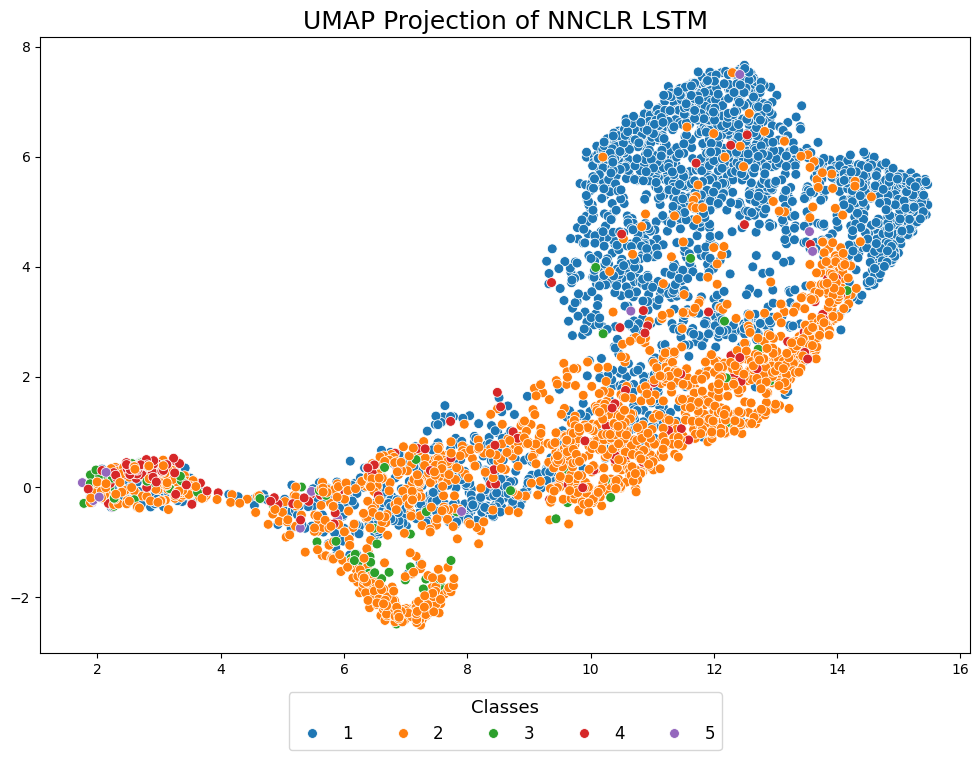

In [ ]:
plt_um.umap_plt(train_nn_lstm, val_nn_lstm, test_nn_lstm, ny_train, ny_val, ny_test, 'NNCLR LSTM')

In [ ]:
#nnclr_cnn embedding
train_nn_cnn, val_nn_cnn, test_nn_cnn = nn.nnclr_lstm_embedding(train_sc, val_sc, test_sc,y_train_df-1,y_val_df-1,y_test_df-1,64,5)

x_train_df shape: (400, 140)
y_train_df shape: (400,)
x_val_df shape: (100, 140)
y_val_df shape: (100,)
x_test_df shape: (4500, 140)
y_test_df shape: (4500,)


Model: "encoder_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 140, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 140, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 140, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 140, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_5               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,400 (806.25 KB)

 Trainable params: 206,400 (806.25 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "nnclr_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ contrastive_augmenter (Sequential)   │ (None, None, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification_augmenter             │ (None, None, 1)             │               0 │
│ (Sequential)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_model (Sequential)           │ (None, 64)                  │         206,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ projection_head (Sequential)         │ (None, 64)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ linear_probe (Sequential)            │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,045 (840.02 KB)

 Trainable params: 215,045 (840.02 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
4/4 - 56s - 14s/step - c_acc: 0.0307 - c_loss: 3.5806 - p_acc: 0.0300 - p_loss: 1.6070 - r_acc: 0.0371 - val_p_acc: 0.0189 - val_p_loss: 1.6136
Epoch 2/20
4/4 - 45s - 11s/step - c_acc: 0.0439 - c_loss: 3.5571 - p_acc: 0.0300 - p_loss: 1.6035 - r_acc: 0.0684 - val_p_acc: 0.0189 - val_p_loss: 1.6124
Epoch 3/20
4/4 - 26s - 6s/step - c_acc: 0.0592 - c_loss: 3.4722 - p_acc: 0.0400 - p_loss: 1.5981 - r_acc: 0.0938 - val_p_acc: 0.0262 - val_p_loss: 1.6127
Epoch 4/20
4/4 - 27s - 7s/step - c_acc: 0.0395 - c_loss: 3.4378 - p_acc: 0.2700 - p_loss: 1.5905 - r_acc: 0.0586 - val_p_acc: 0.5840 - val_p_loss: 1.6139
Epoch 5/20
4/4 - 59s - 15s/step - c_acc: 0.0263 - c_loss: 3.4516 - p_acc: 0.5200 - p_loss: 1.5819 - r_acc: 0.0508 - val_p_acc: 0.5840 - val_p_loss: 1.6128
Epoch 6/20
4/4 - 63s - 16s/step - c_acc: 0.0439 - c_loss: 3.5259 - p_acc: 0.5200 - p_loss: 1.5743 - r_acc: 0.0684 - val_p_acc: 0.5838 - val_p_loss: 1.6127
Epoch 7/20
4/4 - 27s - 7s/step - c_acc: 0.0417 - c_loss: 3.4511 - p

In [ ]:
np.savetxt('tr_ep_nn_cnn_embeddings.txt', train_nn_cnn)
np.savetxt('te_ep_nn_cnn_embeddings.txt', test_nn_cnn)
np.savetxt('vl_ep_nn_cnn_embeddings.txt', val_nn_cnn)

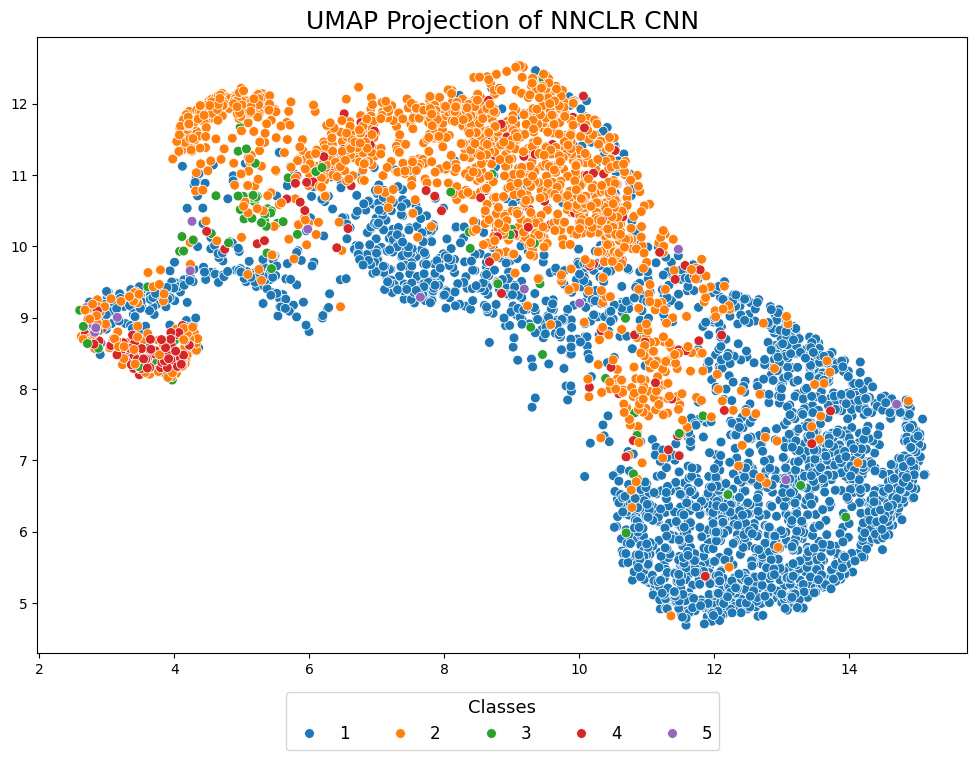

In [ ]:
plt_um.umap_plt(train_nn_cnn, val_nn_cnn, test_nn_cnn, ny_train, ny_val, ny_test, 'NNCLR CNN')

## Now for the classification of the embeddings, we import the two relative scripts, as well as provide a name for the beginning of the classifucation report.
### Here, the test accuracy and the time taken (in seconds), the best tuned hyperparameters for each classification method are showcased, and the name of the classification report file produced is provided

In [42]:
namem="ECG5000_pca"

best_params, best_score = clasfy.optimize_LOGRG(train_pca, val_pca, test_pca,ny_train, ny_val, ny_test,namem)
print(best_params, best_score)


[I 2024-12-14 05:22:13,981] A new study created in memory with name: no-name-d36d687c-3149-47a3-8339-8ea4c3bb7526
[I 2024-12-14 05:22:17,549] Trial 0 finished with value: 0.92 and parameters: {'C': 129.1292492136316, 'fit_intercept': False, 'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.6170795796631532}. Best is trial 0 with value: 0.92.
[I 2024-12-14 05:22:17,602] Trial 1 finished with value: 0.52 and parameters: {'C': 1.8379280822475985e-08, 'fit_intercept': True, 'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.47296242392152554}. Best is trial 0 with value: 0.92.
[I 2024-12-14 05:22:17,644] Trial 2 finished with value: 0.52 and parameters: {'C': 1.9538225561944714e-10, 'fit_intercept': False, 'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.2643754599786986}. Best is trial 0 with value: 0.92.
[I 2024-12-14 05:22:17,684] Trial 3 finished with value: 0.52 and parameters: {'C': 8.154322187901066e-10, 'fit_intercept': True, 'solver': 'saga', 'penalty': 'elast

0.08679699897766113  seconds
Classification report saved as ECG5000_pca_classification_report_2024-12-14_05-24-43.txt
{'C': 0.741840809847924, 'fit_intercept': True, 'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.2421934658096227} 0.9395555555555556


In [ ]:
best_params, best_score = clasfy.optimize_DT(train_pca, val_pca, test_pca,ny_train, ny_val, ny_test,namem)
print(best_params, best_score)


[I 2024-12-14 05:13:51,423] A new study created in memory with name: no-name-b2578050-e4c5-4967-8f6a-e3b803b1374b
[I 2024-12-14 05:13:51,444] Trial 0 finished with value: 0.83 and parameters: {'max_depth': 25, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.83.
[I 2024-12-14 05:13:51,459] Trial 1 finished with value: 0.84 and parameters: {'max_depth': 29, 'criterion': 'entropy'}. Best is trial 1 with value: 0.84.
[I 2024-12-14 05:13:51,474] Trial 2 finished with value: 0.84 and parameters: {'max_depth': 21, 'criterion': 'entropy'}. Best is trial 1 with value: 0.84.
[I 2024-12-14 05:13:51,488] Trial 3 finished with value: 0.84 and parameters: {'max_depth': 24, 'criterion': 'gini'}. Best is trial 1 with value: 0.84.
[I 2024-12-14 05:13:51,503] Trial 4 finished with value: 0.82 and parameters: {'max_depth': 14, 'criterion': 'entropy'}. Best is trial 1 with value: 0.84.
[I 2024-12-14 05:13:51,516] Trial 5 finished with value: 0.84 and parameters: {'max_depth': 4, 'criterion': 'log_

0.014764547348022461  seconds
Classification report saved as ECG5000_pca_classification_report_2024-12-14_05-13-53.txt
{'max_depth': 22, 'criterion': 'entropy'} 0.8793333333333333


In [43]:
best_params, best_score = clasfy.optimize_RF(train_pca, val_pca, test_pca,ny_train, ny_val, ny_test,namem)
print(best_params, best_score)

[I 2024-12-14 05:24:49,833] A new study created in memory with name: no-name-43e0baa4-1027-438d-9ce4-6c7aed6b0540
[I 2024-12-14 05:24:50,040] Trial 0 finished with value: 0.88 and parameters: {'n_estimators': 134, 'max_depth': 5}. Best is trial 0 with value: 0.88.
[I 2024-12-14 05:24:50,126] Trial 1 finished with value: 0.88 and parameters: {'n_estimators': 48, 'max_depth': 30}. Best is trial 0 with value: 0.88.
[I 2024-12-14 05:24:50,418] Trial 2 finished with value: 0.89 and parameters: {'n_estimators': 165, 'max_depth': 28}. Best is trial 2 with value: 0.89.
[I 2024-12-14 05:24:50,479] Trial 3 finished with value: 0.88 and parameters: {'n_estimators': 33, 'max_depth': 26}. Best is trial 2 with value: 0.89.
[I 2024-12-14 05:24:50,551] Trial 4 finished with value: 0.88 and parameters: {'n_estimators': 39, 'max_depth': 11}. Best is trial 2 with value: 0.89.
[I 2024-12-14 05:24:50,820] Trial 5 finished with value: 0.89 and parameters: {'n_estimators': 170, 'max_depth': 6}. Best is trial

0.20835471153259277  seconds
Classification report saved as ECG5000_pca_classification_report_2024-12-14_05-25-17.txt
{'n_estimators': 103, 'max_depth': 21} 0.9168888888888889


In [44]:
best_params, best_score = clasfy.optimize_KNN(train_pca, val_pca, test_pca,ny_train, ny_val, ny_test,namem)
print(best_params, best_score)


[I 2024-12-14 05:25:17,012] A new study created in memory with name: no-name-2683f946-d385-48f9-afaf-21ce4f4f3ba7
[I 2024-12-14 05:25:17,082] Trial 0 finished with value: 0.88 and parameters: {'n_neighbors': 20, 'weights': 'uniform', 'algorithm': 'brute'}. Best is trial 0 with value: 0.88.
[I 2024-12-14 05:25:17,089] Trial 1 finished with value: 0.88 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 0 with value: 0.88.
[I 2024-12-14 05:25:17,183] Trial 2 finished with value: 0.89 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'algorithm': 'brute'}. Best is trial 2 with value: 0.89.
[I 2024-12-14 05:25:17,253] Trial 3 finished with value: 0.91 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'algorithm': 'brute'}. Best is trial 3 with value: 0.91.
[I 2024-12-14 05:25:17,306] Trial 4 finished with value: 0.89 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 3 with value: 0.

0.007732391357421875  seconds
Classification report saved as ECG5000_pca_classification_report_2024-12-14_05-25-21.txt
{'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'brute'} 0.9384444444444444


In [45]:
best_params, best_score = clasfy.optimize_XGBOOST(train_pca, val_pca, test_pca,ny_train2, ny_val2, ny_test2,namem)
print(best_params, best_score)

[I 2024-12-14 05:25:21,087] A new study created in memory with name: no-name-93ed59ca-1f63-41e3-892d-f6c8345094dd
[I 2024-12-14 05:25:23,600] Trial 0 finished with value: 0.87 and parameters: {'n_estimators': 68, 'learning_rate': 0.05464992918152476, 'max_depth': 32, 'min_child_weight': 2.918338269635248, 'subsample': 0.11108714297046086, 'colsample_bytree': 0.28943700034012554}. Best is trial 0 with value: 0.87.
[I 2024-12-14 05:25:27,511] Trial 1 finished with value: 0.86 and parameters: {'n_estimators': 58, 'learning_rate': 0.7699483820624046, 'max_depth': 16, 'min_child_weight': 9.504844079361739, 'subsample': 0.48551684431603104, 'colsample_bytree': 0.8716475019439163}. Best is trial 0 with value: 0.87.
[I 2024-12-14 05:25:28,678] Trial 2 finished with value: 0.87 and parameters: {'n_estimators': 156, 'learning_rate': 0.7307705585685945, 'max_depth': 24, 'min_child_weight': 4.344994826987064, 'subsample': 0.28687800497904226, 'colsample_bytree': 0.6924009662356438}. Best is trial 

5.466770172119141  seconds
Classification report saved as ECG5000_pca_classification_report_2024-12-14_05-30-55.txt
{'n_estimators': 200, 'learning_rate': 0.5646113878843237, 'max_depth': 5, 'min_child_weight': 1.114021725428703, 'subsample': 0.9388772535766635, 'colsample_bytree': 0.6542507718808667} 0.9246666666666666


In [46]:

best_params, best_score = clasfy.optimize_SVM(train_pca, val_pca, test_pca,ny_train, ny_val, ny_test,namem)
print(best_params, best_score)


[I 2024-12-14 05:30:55,722] A new study created in memory with name: no-name-9aa0c588-940a-4080-90b4-b6a42c954d60
[I 2024-12-14 05:30:55,730] Trial 0 finished with value: 0.92 and parameters: {'C': 0.6, 'kernel': 'linear', 'degree': 5, 'gamma': 'auto'}. Best is trial 0 with value: 0.92.
[I 2024-12-14 05:30:55,737] Trial 1 finished with value: 0.92 and parameters: {'C': 0.6, 'kernel': 'linear', 'degree': 3, 'gamma': 'auto'}. Best is trial 0 with value: 0.92.
[I 2024-12-14 05:30:55,743] Trial 2 finished with value: 0.92 and parameters: {'C': 0.6, 'kernel': 'linear', 'degree': 4, 'gamma': 'scale'}. Best is trial 0 with value: 0.92.
[I 2024-12-14 05:30:55,750] Trial 3 finished with value: 0.92 and parameters: {'C': 1, 'kernel': 'rbf', 'degree': 3, 'gamma': 'scale'}. Best is trial 0 with value: 0.92.
[I 2024-12-14 05:30:55,758] Trial 4 finished with value: 0.92 and parameters: {'C': 1, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto'}. Best is trial 0 with value: 0.92.
[I 2024-12-14 05:30:55,7

0.011099100112915039  seconds
Classification report saved as ECG5000_pca_classification_report_2024-12-14_05-30-56.txt
{'C': 0.6, 'kernel': 'linear', 'degree': 5, 'gamma': 'auto'} 0.9315555555555556


In [47]:
best_params, best_score = clasfy2.optimize_NB(train_pca, val_pca, test_pca,ny_train, ny_val, ny_test,namem)
print(best_params, best_score)


[I 2024-12-14 05:30:56,838] A new study created in memory with name: no-name-beb2e020-a83a-482f-bac6-b42515093413
[I 2024-12-14 05:30:56,843] Trial 0 finished with value: 0.88 and parameters: {'var_smoothing': 0.0003504594780005943}. Best is trial 0 with value: 0.88.
[I 2024-12-14 05:30:56,846] Trial 1 finished with value: 0.88 and parameters: {'var_smoothing': 0.00045540271790974797}. Best is trial 0 with value: 0.88.
[I 2024-12-14 05:30:56,849] Trial 2 finished with value: 0.87 and parameters: {'var_smoothing': 9.768529009802859e-06}. Best is trial 0 with value: 0.88.
[I 2024-12-14 05:30:56,853] Trial 3 finished with value: 0.88 and parameters: {'var_smoothing': 0.000849171910185239}. Best is trial 0 with value: 0.88.
[I 2024-12-14 05:30:56,856] Trial 4 finished with value: 0.87 and parameters: {'var_smoothing': 5.8196959497110936e-08}. Best is trial 0 with value: 0.88.
[I 2024-12-14 05:30:56,859] Trial 5 finished with value: 0.88 and parameters: {'var_smoothing': 0.00269343365833545

Best hyperparameters:  {'var_smoothing': 0.0064960602143828575}
Best validation accuracy:  0.89
Test accuracy: 0.9104444444444444
Time taken: 0.006109714508056641 seconds
Classification report saved as ECG5000_pca_classification_report_2024-12-14_05-30-57.txt
{'var_smoothing': 0.0064960602143828575} 0.9104444444444444


In [48]:

best_params, best_score = clasfy2.optimize_MLP(train_pca, val_pca, test_pca, ny_train, ny_val,ny_test,namem)
print(best_params, best_score)

[I 2024-12-14 05:30:57,393] A new study created in memory with name: no-name-e33ca006-f027-42ef-80c9-f96235eedbcd
[I 2024-12-14 05:30:58,426] Trial 0 finished with value: 0.89 and parameters: {'n_layers': 2, 'n_neurons_layer0': 77, 'n_neurons_layer1': 41, 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00837903196617277}. Best is trial 0 with value: 0.89.
[I 2024-12-14 05:30:59,278] Trial 1 finished with value: 0.89 and parameters: {'n_layers': 2, 'n_neurons_layer0': 76, 'n_neurons_layer1': 22, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 2.5288028087957154e-05}. Best is trial 0 with value: 0.89.
[I 2024-12-14 05:30:59,327] Trial 2 finished with value: 0.9 and parameters: {'n_layers': 1, 'n_neurons_layer0': 65, 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 1.35560347002923e-05}. Best is trial 2 with value: 0.9.
[I 2024-12-14 05:30:59,378] Trial 3 finished with value: 0.9 and parameters: {'n_layers': 1, 'n_neurons_layer0': 90, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha

{'activation': 'relu', 'solver': 'adam', 'alpha': 0.016156584893616842, 'hidden_layer_sizes': [29, 44]}
Classification report saved as ECG5000_pca_classification_report_2024-12-14_05-31-54.txt
{'activation': 'relu', 'solver': 'adam', 'alpha': 0.016156584893616842, 'hidden_layer_sizes': [29, 44]} 0.9284444444444444
